In [148]:
import pandas as pd
import os
from datetime import date
today = str(date.today())

In [149]:
cwd = os.getcwd()
data = pd.read_csv(cwd + '/Best_ELS T1 Integrated Stress Interview_Panel Ratings_USE_FOR_ANALYSIS.csv', header = 0)
subs = pd.read_csv(cwd + '/cort_subs.csv', header = 0)

#Filter by Objective severity:
#data = data1.loc[data['Panel_Objective_Decision'].isin(['2.5','3','3.5','4', '4.5','5'])]

In [150]:
event_dict = {
              '1': 'Experienced Traumatic Accident',
              '2': 'Witnessed Traumatic Accident',
              '3': 'Natural Disaster',
              '4': 'Experience Illness/Injury',
              '5': 'Witness Illness/Injury',
              '6': 'Traumatic Death of Loved One',
              '7': 'Separation from Loved One (Work, Travel)',
              '8': 'Moved Between Families/Others Moving Into or Out of Home',
              '9': 'Parental Divorce/Separation',
              '10': 'Separation from Loved One',
              '11': 'Witness to Loved One Mental Illness/Substance Abuse',
              '12': 'Witness to Self-Harm/Suicide',
              '13': 'Physical Abuse/Attack',
              '14': 'Threat of Physical Abuse/Attack',
              '15': 'Victim of Intimidation/Bullying',
              '16': 'Kidnapping',
              '17': 'Animal Attack',
              '18': 'Domestic Violence (Non-Physical)',
              '19': 'Domestic Violence Threat',
              '20': 'Domestic Violence Physical',
              '21': 'Family Legal Trouble/Arrest',
              '22': 'Witness to Stranger Arguments',
              '23': 'Witness to Stranger Physical Fights',
              '24': 'Witness to War/Terrorism',
              '25': 'Victim of Sex or Sexual Abuse',
              '26': 'Witness to Sexual Abuse',
              '27': 'Emotional Abuse',
              '28': 'Neglect',
              '29': 'Financial Troubles',
              '30': 'Other',
              '31': 'Community Instability',
              '32': 'Mugging'}

In [151]:
data_03 = data.loc[data['Age_onset'].isin(['0','1','2','3'])]
data_03_count = pd.DataFrame(data_03['Event_Domain'].value_counts()).reset_index()
data_03_count.rename(columns = {'index':'Domain_03', 'Event_Domain':'Occurances_03'}, inplace=True)
data_03_nodup = data_03.drop_duplicates(subset = ['ELS_ID', 'Event_Domain'], keep = 'first')
event_count_3 = data_03_nodup.groupby('Event_Domain').count().reset_index()

In [152]:
data_06 = data.loc[data['Age_onset'].isin(['4','5','6'])]
data_06_count = pd.DataFrame(data_06['Event_Domain'].value_counts()).reset_index()
data_06_count.rename(columns = {'index':'Domain_06', 'Event_Domain':'Occurances_06'}, inplace=True)
data_06_nodup = data_06.drop_duplicates(subset = ['ELS_ID', 'Event_Domain'], keep = 'first')
event_count_6 = data_06_nodup.groupby('Event_Domain').count().reset_index()

In [153]:
data_09 = data.loc[data['Age_onset'].isin(['7','8','9'])]
data_09_count = pd.DataFrame(data_09['Event_Domain'].value_counts()).reset_index()
data_09_count.rename(columns = {'index':'Domain_09', 'Event_Domain':'Occurances_09'}, inplace=True)
data_09_nodup = data_09.drop_duplicates(subset = ['ELS_ID', 'Event_Domain'], keep = 'first')
event_count_9 = data_09_nodup.groupby('Event_Domain').count().reset_index()

In [154]:
data_12 = data.loc[data['Age_onset'].isin(['10','11','12'])]
data_12_count = pd.DataFrame(data_12['Event_Domain'].value_counts()).reset_index()
data_12_count.rename(columns = {'index':'Domain_12', 'Event_Domain':'Occurances_12'}, inplace=True)
data_12_nodup = data_12.drop_duplicates(subset = ['ELS_ID', 'Event_Domain'], keep = 'first')
event_count_12 = data_12_nodup.groupby('Event_Domain').count().reset_index()

In [155]:
#Generate Plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import matplotlib.patches as mpatches

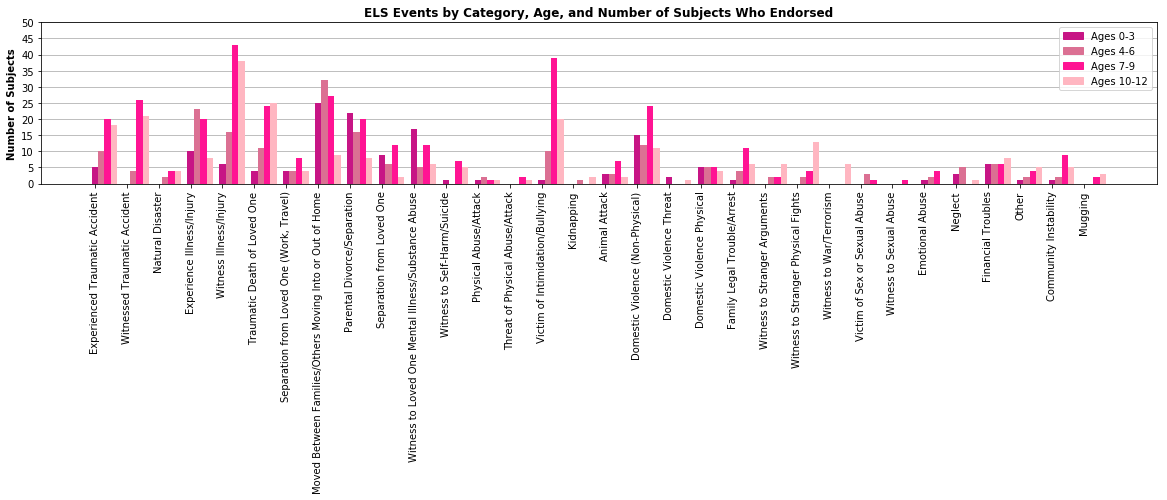

In [156]:
#Define x and y axes
x3 = event_count_3['Event_Domain']
y3 = event_count_3['ELS_ID']
x6 = event_count_6['Event_Domain']
y6 = event_count_6['ELS_ID']
x9 = event_count_9['Event_Domain']
y9 = event_count_9['ELS_ID']
x12 = event_count_12['Event_Domain']
y12 = event_count_12['ELS_ID']

w = 0.2
labels = event_dict.values()
fig, ax = plt.subplots(figsize=(20, 8))#1, 3, sharex = True, sharey=True)

try1 = ax.bar(x3, width = w, height = y3, color='#C71585', label = 'Ages 0-3', align = 'center')
try2 = ax.bar(x6+w, width = w, height = y6, color='#DB7093', label = 'Ages 4-6', align = 'center')
try3 = ax.bar(x9+w+w, width = w, height = y9, color='#FF1493', label = 'Ages 7-9', align = 'center')
try4 = ax.bar(x12+w+w+w, width = w, height = y12, color='#FFB6C1', label = 'Ages 10-12', align = 'center')

patch3 = mpatches.Patch(color='#C71585', label='Ages 0-3')
patch6 = mpatches.Patch(color='#DB7093', label='Ages 4-6')
patch9 = mpatches.Patch(color='#FF1493', label='Ages 7-9')
patch12 = mpatches.Patch(color='#FFB6C1', label='Ages 10-12')
plt.legend(handles=[patch3, patch6, patch9, patch12], prop={'size': 10})

plt.xticks(np.arange(1,33,step = 1.0), rotation = 'vertical')
#ax.autoscale(enable=True, axis='y')
plt.yticks(np.arange(51,step = 5.0))
plt.gcf().subplots_adjust(bottom=.6)
ax.set_xticklabels(labels)
ax.grid(True, axis = 'y')
ax.set_axisbelow(True)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Subjects', fontsize = 'medium', fontweight = 'bold')
ax.set_title('ELS Events by Category, Age, and Number of Subjects Who Endorsed', fontsize = 'large', fontweight = 'bold')

plt.show()
fig.savefig(cwd + "/ELS_Age_Type_Barplot_Subject_"+today+".png")